In [1]:
import Pkg; Pkg.add("StatsBase")

  Resolving package versions...
 Installing known registries into `~/.julia`
######################################################################### 100.0%


LoadError: [91mSystemError: opening file "/Users/dianal.monroy/.julia/registries/General/Registry.toml": No such file or directory[39m

In [10]:
n = 10
L = 8*n + 4
t = 1
Ne = Int(L / 2)

42

In [11]:
#Hamiltonian
function Hamiltonian(L,t)
    H = zeros(2*L, 2*L)
    H[1,L] = -t
    H[L,1] = -t
    H[2L,L+1] = -t
    H[L+1,2L] = -t
    for i=1:2*L
      for j=1:2*L
        if i == j + 1 || i == j - 1
          H[i,j] = -t
        end 
      end
    end
    H[L,L+1]=0
    H[L+1,L]=0
    return H
end

H = Hamiltonian(L,t);

In [42]:
import Pkg; Pkg.add("CircularArrays")

 Installing known registries into `~/.julia`
######################################################################### 100.0%####################                           66.4%#####################    97.5%


LoadError: [91mSystemError: opening file "/Users/dianal.monroy/.julia/registries/General/Registry.toml": No such file or directory[39m

In [37]:
#generate, convert state
using StatsBase
using CircularArrays

function Lstate(L)                                 #generate a state of length L
    Lstated, Lstateu, Lstate = zeros(L), zeros(L), zeros(L)
    randomposu = sample(collect(1:L), Int(L/4), replace=false)
    randomposd = sample(collect(1:L), Int(L/4), replace=false)
    for j in randomposu
        Lstateu[j] = 1
    end
    for j in randomposd
        Lstated[j] = -1
    end
    for i=1:L 
        if Lstated[i] == -1 && Lstateu[i] == 1
            Lstate[i] = 2
        else
            Lstate[i] = Lstated[i] + Lstateu[i]
        end
    end
    return CircularArray(Lstate)
end

function extendedstate(Lstatevector)               #take a state of length L and make it 2*L
    L = length(Lstatevector)
    State2L = zeros(2*L)
    for j=1:L
        if Lstatevector[j] == -1
            State2L[j + L] = 1
        elseif Lstatevector[j] == 1
            State2L[j] = 1
        elseif Lstatevector[j] == 2
            State2L[j], State2L[j + L] = 1,1
        else
            State2L[j] = 0
        end
    end
    return State2L
end

function shortstate(ext_state)                    #pass trom 2*L state to L state
    L = Int(length(ext_state)/2)
    sh_state = zeros(L)
    for j=1:L
        if ext_state[j]==1
            sh_state[j]=1
        end
    end
    for j=1:L
        if ext_state[L+j]==1
            if sh_state[j]==1
                sh_state[j]=2
            else
                sh_state[j]=-1
            end
        end
    end
    return sh_state
end


LoadError: [91mArgumentError: Package CircularArrays not found in current path:[39m
[91m- Run `import Pkg; Pkg.add("CircularArrays")` to install the CircularArrays package.[39m


In [13]:
#generate a move
function Pauli(x,i,j)                 #check if state i and j are both occupied
    if x[i] == 1 && x[j] == 1
        return true
    end
    return false
end 

function occupied_states(v)         #generate a vector with positions of occupied states (from 2*L states)
    occ_states = []
    L = length(v)
    for i = 1:L
        if v[i] == 1
            append!(occ_states, i)
        end
    end
    return occ_states
end


function occupied_states_L(v)
    occ_states = []
    L =length(v)
    for i = 1 : L
        if abs(v[i]) == 1
            append!(occ_states, i )
            
        elseif v[i] == 2
            append!(occ_states, i )
        
        end
    end
    return occ_states
end

function empty_states(v)
    empty_st_u = []
    empty_st_d = []
    L = length(v)
    for i = 1 : Int(L/2)
        if v[i] == 0
               append!(empty_st_u, i )
        end
    end
    for i = Int(L/2)+1 : L
        if v[i] == 0
               append!(empty_st_d, i )
        end
    end
    return empty_st_u, empty_st_d
end
function move_L(w)
    
    v = copy(w)
    L = length(v)
    i = rand(occupied_states_L(v))
    j = rand(-1:2:1)

    j_pbc = mod(i+j,L)
    j_pbc == 0 ? j_pbc = L : j_pbc = j_pbc

        if v[i] != v[j_pbc] && v[j_pbc]!=2

            if abs(v[i])==1
            v[j_pbc] == 0 ? v[j_pbc] = v[i] : v[j_pbc] = 2
            v[i] = 0

            elseif v[i]==2    
            spin = rand(-1:2:1)

                if v[j_pbc] != spin
                v[i] = -spin

                    if abs(v[j_pbc]) == 1 
                        v[j_pbc] = 2 
                    elseif v[j_pbc] == 0 
                        v[j_pbc] = spin 
                    end

                end    
            end
            
        end

    return v
    
end


move_L (generic function with 1 method)

In [14]:
function move_last_2L(w)
    v = copy(w)
    L = length(v)
    i = rand(occupied_states(v))
    if i < L+1 
        j = rand(empty_states(v)[1])
        v[j] = v[i]
    else 
        j = rand(empty_states(v)[2])
    end
    v[i] = 0
    b = shortstate(v)
    return b
end

a = [1,0,0,1,0,1]
display(shortstate(a))
move_last_2L(a)

LoadError: [91mUndefVarError: shortstate not defined[39m

In [15]:
#generate unitary matrices and the ratio of determinants
using LinearAlgebra
U = eigvecs(H)  #unitary matrix
Udag = inv(U)   #U^-1
E = eigvals(H)  #eigenvalues of H

function U1(A, Ne) #take the first Ne columns
    U_1 = A[:,1:Ne]
    return U_1
end

U_1 = U1(U,Ne)

function U_tilde(A,v)                  #takes just the rows related to occupied states, Ne*Ne matrix
    U_tild = []
    U_tild = A[occupied_states(v),:]
    return U_tild
end

function ratio_det(v, z)
    rat= det(U_tilde(U_1,z))/det(U_tilde(U_1,v))
    return rat
end  


ratio_det (generic function with 1 method)

In [16]:
#Jastrow factor
function n_i(vi)           #counts the number of els in positions vi, returning (# up , # down)
    
    n_up = 0
    n_down = 0
    
        if vi == 1
            n_up += 1
            
        elseif vi == -1
            n_down += 1
                
        elseif vi == 2
            n_down += 1
            n_up += 1
                
        end

return n_up, n_down

end

function Jastrow(state,g,v)
            
    D=length(state)       
    
    Spins=0
    Occupancies=0        
    n1 = n_i(state[D])[1] + n_i(state[D])[2]
    n2 = 0
    
    for i = 1 : D
                
        n_up= n_i(state[i])[1]    
        n_down = n_i(state[i])[2]
                
    Spins = Spins + n_up*n_down 
                
    n2= n_up + n_down
    n1n2 = n1*n2   
    n1 = n2
                
    Occupancies = Occupancies + n1n2
            
        end
    
    arg=  -g*Spins -v*Occupancies
            
return exp(arg)

end

Jastrow (generic function with 1 method)

In [17]:
v= [1,0,0,0,2,0,-1,0]

Jastrow(v,10,2)

4.539992976248485e-5

In [18]:
nA(v)

LoadError: [91mUndefVarError: nA not defined[39m

In [19]:
nB(v)

LoadError: [91mUndefVarError: nB not defined[39m

In [20]:
#This function calculates the density observable in the odd sites A
function nA(v)
    nA = 0
    for j=1:length(v)
        if j%2 != 0
            nA += sum(n_i(v[j])) 
        end
    end
    return nA*2/length(v)
end

#This function calculates the density observable in the even sites B
function nB(v)
    nB = 0
    for j=1:length(v)
        if j%2 == 0
            nB += sum(n_i(v[j])) 
        end
    end
    return nB*2/length(v)
end

nB (generic function with 1 method)

In [21]:
#Block analysis
function Block(v, Ne, Ni)
    
    Average_Bin = []
    
    N=length(v)
    
    Lbin = Ne
    
    Nbin = floor(Int,N/Lbin)
    
    a=0
    b=0
    
    for i in Ni:Nbin
       
    a = (i-1)*Lbin +1
    b = i*Lbin
        
av_bin = (1/Int(abs(Lbin)))*(sum(v[Int64(a):Int64(b)]))
        
push!(Average_Bin,av_bin)
        
    end

return sum(Average_Bin)/(Nbin-Ni+1), Nbin

end

Block (generic function with 1 method)

In [22]:
function move_last_2L(w)
    v = copy(w)
    L = length(v)
    i = rand(occupied_states(v))
    if i < L+1
        j = rand(empty_states(v)[1])
        v[j] = v[i]
    else 
        j = rand(empty_states(v)[2])
    end
    v[i] = 0
    b = shortstate(v)
    return b
end

move_last_2L (generic function with 1 method)

In [23]:
function hopping(v)
    w = copy(v)
    occupied_positions = occupied_states_L(v)
    i = rand(occupied_positions)
    nn = [v[i + 1],v[i - 1]]
    nnpos = [i + 1, i - 1]
    rndnnpos = rand([i + 1,i - 1])
    rndnn = rand(nn)
    
    if nn[1] == 2 && nn[2] == 2 || v[i] == 1 && nn[1] == 1 && nn[2] == 2 || v[i] == 1 && nn[1] == 2 && nn[2] == 1 || v[i] == 1 && nn[1] == 1 && nn[2] == 1 || v[i] == -1 && nn[1] == -1 && nn[2] == 2 || v[i] == -1 && nn[1] == 2 && nn[2] == -1 || v[i] == -1 && nn[1] == -1 && nn[2] == -1
        i = rand(deleteat!(occupied_positions, findall(x->x==i,occupied_positions)))
    end
    
    if v[i] == 1 && v[rndnnpos] == 1 || v[i] == 1 && v[rndnnpos] == 2
        rndnnpos = rand(deleteat!(nnpos, findall(x->x==rndnnpos, nnpos)))
    end
    
    if v[i] == -1 && v[rndnnpos] == -1 || v[i] == -1 && v[rndnnpos] == 2
        rndnnpos = rand(deleteat!(nnpos, findall(x->x==rndnnpos, nnpos)))
    end
    
    if v[i] == 2 && v[rndnnpos] == 2
        rndnnpos = rand(deleteat!(nnpos, findall(x->x==rndnnpos, nnpos)))
    end
     
    if v[i] == 1
        if v[rndnnpos] == -1
            w[i], w[rndnnpos] = 0, 2
        elseif v[rndnnpos] == 0
            w[i], w[rndnnpos] = 0, 1
        end
    
    elseif v[i] == -1 
        if v[rndnnpos] == 1
            w[i], w[rndnnpos] = 0, 2
        elseif v[rndnnpos] == 0
            w[i], w[rndnnpos] = 0, -1
        end
    
    elseif v[i] == 2
        if v[rndnnpos] == 1 
            w[i], w[rndnnpos] = 1, 2
        elseif v[rndnnpos] == -1
            w[i], w[rndnnpos] = -1,2
        elseif v[rndnnpos] == 0
            choosenspin = rand([1,-1])
            w[i], w[rndnnpos] = -1*choosenspin, choosenspin
        end
    end
    
    return w
end

hopping (generic function with 1 method)

In [24]:
#Block analysis
function Block(v, Ne, Ni)
    
    Average_Bin = []
    
    N=length(v)
    
    Lbin = Ne
    
    Nbin = floor(Int,N/Lbin)
    
    a=0
    b=0
    
    for i in Ni:Nbin
       
    a = (i-1)*Lbin +1
    b = i*Lbin
        
av_bin = (1/Int(abs(Lbin)))*(sum(v[Int64(a):Int64(b)]))
        
push!(Average_Bin,av_bin)
        
    end

return sum(Average_Bin)/(Nbin-Ni+1), Nbin

end

Block (generic function with 1 method)

In [25]:
#Monte Carlo simulation that calculates <nA> using Block Analysis
import Random

function MC_Ne(q0, g, v, Ne,Ni, nsteps)
    
    Random.seed!(1234)
    state_L = q0
    sumA=0
    sumB=0
    accepted_moves = 0
    accepted_Ne = 0
    
    Suma_A = []
    Suma_B = []
    
    
    for istep = 1:nsteps
        state_2L = extendedstate(state_L)
        state_new_L = move_L(state_L)
        state_new_2L = extendedstate(state_new_L)
        acc =  (ratio_det(state_2L,state_new_2L) * (Jastrow(state_new_L,g,v)/Jastrow(state_L,g,v)))^2       #acceptance 
        
        acc = min(1,acc)
        
        if acc>rand()        #metropolis rule
            
            accepted_moves += 1 
            
            n_newA= nA(state_new_L)
            sumA+=n_newA
            push!(Suma_A,n_newA)
            
            n_newB= nB(state_new_L)
            sumB+=n_newB
            push!(Suma_B,n_newB)
            
            state_L = copy(state_new_L)
            #compute observables
        
            end
    
    end
    
    return Block(Suma_A,Ne,Ni), Block(Suma_B,Ne,Ni)

end 

MC_Ne (generic function with 1 method)

In [26]:
import Random

function MC(q0, g, v, nsteps) #, Nstates)
    Random.seed!(1234)
    state_L = q0
    sumA=0
    sumB=0
    accepted_moves = 0
    
    Suma_A = []
    Suma_B = []
    
    
    for istep = 1 : nsteps
        
        state_2L = extendedstate(state_L)
        state_new_L = hopping(state_L)
        #state_new_L = move_last_2L(state_2L)
        state_new_2L = extendedstate(state_new_L)
        acc =  (ratio_det(state_2L,state_new_2L) * (Jastrow(state_new_L,g,v)/Jastrow(state_L,g,v)))^2       #acceptance 
        acc = min(1,acc)
        
            if acc>rand()        #metropolis rule

                accepted_moves += 1

                n_newA= nA(state_new_L)
                sumA+=n_newA
                #display(n_newA)
                #push!(Suma_A,sumA/accepted_move)
                push!(Suma_A,n_newA)

                n_newB= nB(state_new_L)
                sumB+=n_newB
                #push!(Suma_B,sumB/accepted_moves)
                push!(Suma_B,n_newB)

                state_L = copy(state_new_L)
                #compute observables
            end
        
    end
    
    return mean(Suma_A), mean(Suma_B), accepted_moves
end 


MC (generic function with 1 method)

In [40]:
state = Lstate(L)

LoadError: [91mUndefVarError: Lstate not defined[39m

In [28]:
v= [1,0,-1,0,1,0,-1,0]

Jastrow(v,10,2)

1.0

In [38]:
MC(state, 10, 5, 10000)

LoadError: [91mUndefVarError: state not defined[39m

In [30]:
MC_prova = MC(state, 10, 8, 10000)

x = collect(1:MC_prova[3])

    plot(x,MC_prova[1])
    plot!(x,MC_prova[2])



LoadError: [91mUndefVarError: state not defined[39m

In [105]:
 MC_Ne(state, 10, 8, 50, 30, 100000)

LoadError: [91mMethodError: no method matching zero(::Type{Any})[39m
[91m[0mClosest candidates are:[39m
[91m[0m  zero(::Type{Union{Missing, T}}) where T at missing.jl:104[39m
[91m[0m  zero([91m::Type{Dates.DateTime}[39m) at /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.5/Dates/src/types.jl:404[39m
[91m[0m  zero([91m::Type{Dates.Date}[39m) at /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.5/Dates/src/types.jl:405[39m
[91m[0m  ...[39m

In [75]:

using Plots

yA = zeros(0)
yB = zeros(0)

for v=2:8
    MC_prova = MC_Ne(state, 10, v,Ne,4, 1000)
    append!(yA, MC_prova[1])
    append!(yB, MC_prova[2])
end
plot(2:8,yA)
plot!(2:8,yB)

BoundsError: [91mBoundsError: attempt to access 7-element UnitRange{Int64} at index [1:14][39m

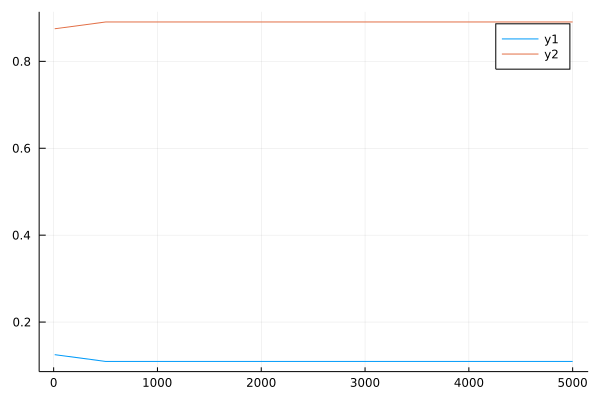

In [154]:
using Plots

yA = zeros(0)
yB = zeros(0)

n = collect(0)

for nsteps in n
    
    MC_prova = MC(state, 10, 6, nsteps)
    
    append!(yA, MC_prova[1])
    append!(yB, MC_prova[2])
end

plot(n,yA)
plot!(n,yB)